In [5]:
!wget ftp://data-out.unavco.org/pub/products/position/AC12/AC12.cwu.nam14.pos


--2020-11-06 00:24:13--  ftp://data-out.unavco.org/pub/products/position/AC12/AC12.cwu.nam14.pos
           => ‘AC12.cwu.nam14.pos’
Resolving data-out.unavco.org (data-out.unavco.org)... 69.44.86.81
Connecting to data-out.unavco.org (data-out.unavco.org)|69.44.86.81|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/products/position/AC12 ... done.
==> SIZE AC12.cwu.nam14.pos ... 1022536
==> PASV ... done.    ==> RETR AC12.cwu.nam14.pos ... done.
Length: 1022536 (999K) (unauthoritative)

AC12.cwu.nam14.pos  100%[===================>] 998.57K  2.48MB/s    in 0.4s    

2020-11-06 00:24:14 (2.48 MB/s) - ‘AC12.cwu.nam14.pos’ saved [1022536]



In [6]:
#extract the date, east, north, vertical motion
!awk 'NR>37{print $1,$16,$17,$18}' AC12.cwu.nam14.pos > AC12.txt
!cat AC12.txt

20080506 -0.05354 0.04473 0.00288
20080507 -0.05197 0.04301 0.00873
20080508 -0.05392 0.04448 0.00576
20080509 -0.05241 0.04448 0.00277
20080510 -0.05114 0.04420 0.00407
20080511 -0.05260 0.04399 0.00726
20080512 -0.05268 0.04409 0.01042
20080513 -0.05287 0.04452 0.01227
20080514 -0.05167 0.04323 0.00825
20080515 -0.05196 0.04345 0.01001
20080516 -0.05060 0.04315 0.00722
20080517 -0.05271 0.04341 0.00526
20080518 -0.05233 0.04410 0.00098
20080519 -0.05165 0.04365 0.00806
20080520 -0.05075 0.04373 0.00308
20080521 -0.05122 0.04457 0.00958
20080522 -0.05160 0.04471 0.00379
20080523 -0.05126 0.04365 0.00549
20080524 -0.05085 0.04605 0.00705
20080525 -0.05084 0.04410 0.00980
20080526 -0.05230 0.04335 0.00843
20080527 -0.04998 0.04324 0.00425
20080528 -0.05135 0.04412 0.01379
20080529 -0.05076 0.04384 0.01100
20080530 -0.05034 0.04330 0.00917
20080531 -0.05013 0.04242 0.01457
20080601 -0.05101 0.04336 0.01419
20080602 -0.05128 0.04255 0.01170
20080603 -0.05144 0.04201 0.01319
20080604 -0.05

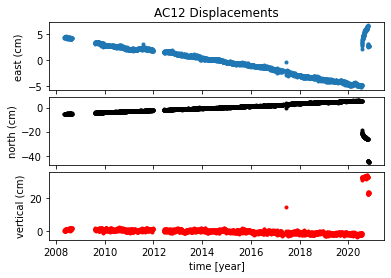

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime 

data = np.genfromtxt("AC12.txt", names=['date', 'dn', 'de','du'])

dates = [datetime.datetime.strptime(str(int(x)), "%Y%m%d") for x in data['date']]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.1)

ax1.plot(dates, data['de']*100, '.')
ax1.set_xticklabels([])
ax1.set_ylabel('east (cm)')
ax1.set_title('AC12 Displacements')

ax2.plot(dates, data['dn']*100, 'k.')
ax2.set_xticklabels([])
ax2.set_ylabel('north (cm)')

ax3.plot(dates, data['du']*100, 'r.')
ax3.set_xlabel('time [year]')
ax3.set_ylabel('vertical (cm)')

plt.savefig("AC12.png")